In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [3]:
columns = ["name", "sex", "births"]
data_pieces = []
for file in os.listdir("names"):
    if file.startswith("yob"):
        year = file[3:7]
        if (int(year) >= 2011):
            continue
        print(year)
        filename = f"datasets/babynames/{file}"
        with open(filename, "r") as f:
            year_data = pd.read_csv(f, header=None, names=columns)
            year_data["year"] = year #np.repeat(year, year_data.shape[0])
            data_pieces.append(year_data)
data = pd.concat(data_pieces, ignore_index=True)

2000
1938
1910
1904
1905
1911
1939
2001
2003
1907
1913
1898
1899
1912
1906
2002
2006
1902
1916
1889
1888
1917
1903
2007
2005
1915
1901
1929
1928
1900
1914
2010
2004
1973
1967
1998
1999
1966
1972
1958
1964
1970
1971
1965
1959
1961
1975
1949
1948
1974
1960
1976
1962
1989
1988
1963
1977
1952
1946
1991
1985
1984
1990
1947
1953
1979
1945
1951
1986
1992
1993
1987
1950
1944
1978
1940
1954
1968
1983
1997
1996
1982
1969
1955
1941
1957
1943
1994
1980
1981
1995
1942
1956
2009
1919
1931
1925
1886
1892
1893
1887
1924
1930
1918
2008
1926
1932
1891
1885
1884
1890
1933
1927
1923
1937
1894
1880
1881
1895
1936
1922
1934
1920
1908
1883
1897
1896
1882
1909
1921
1935


In [4]:
data


,name,sex,births,year
0,Emily,F,25949,2000
1,Hannah,F,23066,2000
2,Madison,F,19965,2000
3,Ashley,F,17991,2000
4,Sarah,F,17677,2000
...,...,...,...,...
1690779,Wilman,M,5,1935
1690780,Winfrey,M,5,1935
1690781,Yazzie,M,5,1935
1690782,Zaragoza,M,5,1935


In [5]:
sorted(data["year"].unique())

['1880',
 '1881',
 '1882',
 '1883',
 '1884',
 '1885',
 '1886',
 '1887',
 '1888',
 '1889',
 '1890',
 '1891',
 '1892',
 '1893',
 '1894',
 '1895',
 '1896',
 '1897',
 '1898',
 '1899',
 '1900',
 '1901',
 '1902',
 '1903',
 '1904',
 '1905',
 '1906',
 '1907',
 '1908',
 '1909',
 '1910',
 '1911',
 '1912',
 '1913',
 '1914',
 '1915',
 '1916',
 '1917',
 '1918',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 

In [6]:
data[data["year"] == "1880"].groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
name_groups = data.groupby("name")
name_groups

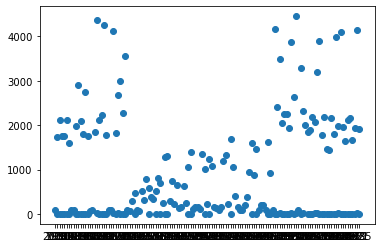

In [8]:
ida = data[data["name"] == "Ida"]
plt.scatter(x=ida["year"], y=ida["births"])

In [9]:
ida

,name,sex,births,year
1924,Ida,F,88,2000
29898,Ida,F,1723,1938
36877,Ida,M,12,1938
38830,Ida,F,2106,1910
43071,Ida,M,6,1910
...,...,...,...,...
1670037,Ida,M,13,1909
1670963,Ida,F,4141,1921
1678707,Ida,M,18,1921
1681872,Ida,F,1923,1935


In [10]:
total_births = data.pivot_table("births", index="year", columns="sex",
aggfunc="sum", margins=True)
total_births

sex,F,M,All
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955
2009,1827643,1973359,3801002


<AxesSubplot:xlabel='year'>

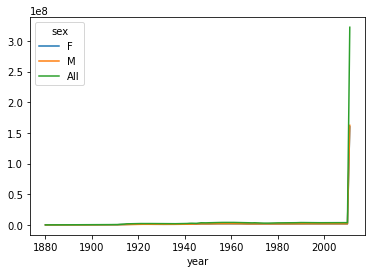

In [11]:
total_births.plot()

In [12]:
def get_prop(group, n=10):
    total_births = group["births"].sum()
    # print(group.name)
    # print(total_births)
    group["prop"] = group["births"]/total_births
    group = group.sort_values("prop", ascending=False)
    group = group.reset_index(drop=True)
    return group.iloc[:n]

top1000 = data.groupby(["year", "sex"]).apply(get_prop, n=1000)
top1000.drop(["year", "sex"], axis=1, inplace=True)

In [13]:
top1000

name  births      prop
year sex                                 
1880 F   0         Mary    7065  0.077643
         1         Anna    2604  0.028618
         2         Emma    2003  0.022013
         3    Elizabeth    1939  0.021309
         4       Minnie    1746  0.019188
...                 ...     ...       ...
2010 M   995     Camilo     194  0.000102
         996     Destin     194  0.000102
         997     Jaquan     194  0.000102
         998     Jaydan     194  0.000102
         999     Maxton     193  0.000102

[261877 rows x 3 columns]

# name trends

In [111]:
idx = pd.IndexSlice
boys = top1000.loc[idx[:, 'M', :]]
boys

name  births      prop
year                               
1880 0       John    9655  0.087381
     1    William    9533  0.086277
     2      James    5927  0.053641
     3    Charles    5348  0.048401
     4     George    5126  0.046392
...           ...     ...       ...
2010 995   Camilo     194  0.000102
     996   Destin     194  0.000102
     997   Jaquan     194  0.000102
     998   Jaydan     194  0.000102
     999   Maxton     193  0.000102

[130997 rows x 3 columns]

In [112]:

girls = top1000.loc[idx[:, 'F', :]]
girls

name  births      prop
year                                 
1880 0         Mary    7065  0.077643
     1         Anna    2604  0.028618
     2         Emma    2003  0.022013
     3    Elizabeth    1939  0.021309
     4       Minnie    1746  0.019188
...             ...     ...       ...
2010 995    Violeta     250  0.000142
     996     Leilah     250  0.000142
     997    Alaysia     250  0.000142
     998      Dania     249  0.000142
     999     Yadira     249  0.000142

[130880 rows x 3 columns]

In [113]:
total_births = top1000.pivot_table("births", 
    index="year", 
    columns="name", 
    aggfunc="sum")

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

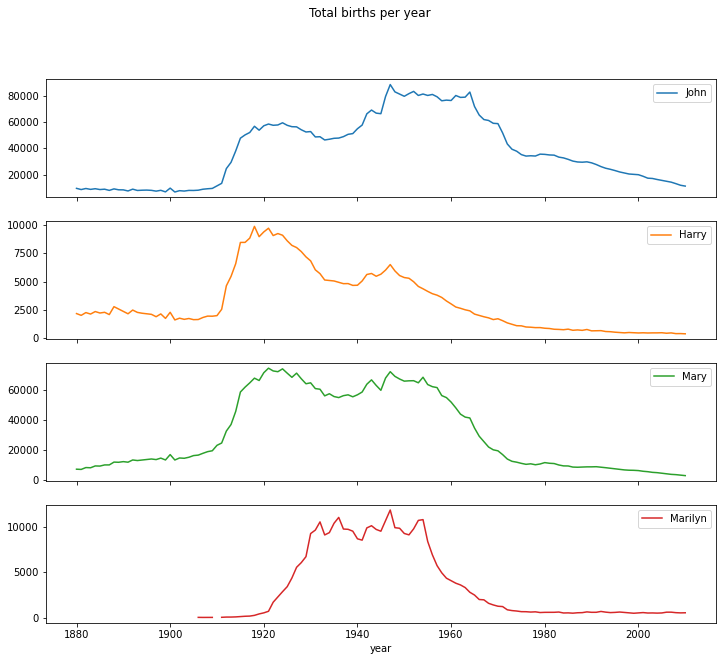

In [114]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
    title="Total births per year")

# increase in name diversity

proportions of birth represented by top 1000 names

<AxesSubplot:title={'center':'Sum of top1000.prop by year and sex'}, xlabel='year'>

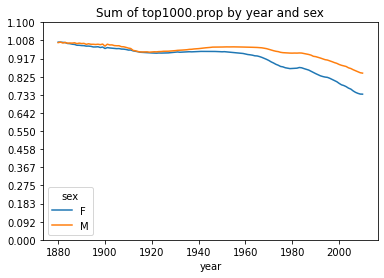

In [117]:
name_props = top1000.pivot_table("prop", index="year",
columns="sex", aggfunc="sum")
name_props.plot(title="Sum of top1000.prop by year and sex",
    yticks=np.linspace(0,1.1,13))

number of distinct names taken in order of popularity in top 50% of births

In [126]:
def sort_get_topq(group, q=0.5):
    total_births = group["births"].sum()
    # print(group.name)
    # print(total_births)
    group["prop"] = group["births"]/total_births
    group = group.sort_values("prop", ascending=False)
    group = group.reset_index(drop=True)
    topq_idx = group.prop.cumsum().searchsorted(q) + 1
    return group.iloc[:topq_idx]

top = data.groupby(["year", "sex"]).apply(sort_get_topq)
top.drop(["year", "sex"], axis=1, inplace=True)

In [127]:
top

name  births      prop
year sex                                 
1880 F   0         Mary    7065  0.077643
         1         Anna    2604  0.028618
         2         Emma    2003  0.022013
         3    Elizabeth    1939  0.021309
         4       Minnie    1746  0.019188
...                 ...     ...       ...
2010 M   112     Miguel    3433  0.001808
         113   Giovanni    3419  0.001801
         114    Timothy    3404  0.001793
         115       Jake    3402  0.001792
         116      Kaleb    3400  0.001791

[13994 rows x 3 columns]

In [132]:
name_diversity = top.groupby(["year", "sex"])["name"].count()
name_diversity = name_diversity.unstack(level=1)

<AxesSubplot:title={'center':'number of popular names in top 50%'}, xlabel='year'>

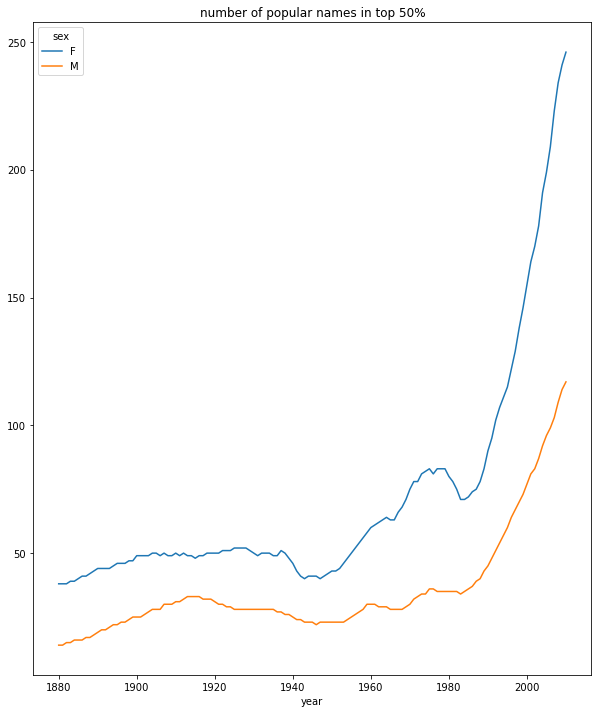

In [134]:
name_diversity.plot(title="number of popular names in top 50%",
    figsize=(10,12))

last letter revolution

In [135]:
data["last_letter"] = data["name"].map(lambda x: x[-1])
data.head()

,name,sex,births,year,last_letter
0,Emily,F,25949,2000,y
1,Hannah,F,23066,2000,h
2,Madison,F,19965,2000,n
3,Ashley,F,17991,2000,y
4,Sarah,F,17677,2000,h


In [140]:
letter_table = data.pivot_table("births", 
    index="last_letter", 
    columns=["sex", "year"],
    aggfunc="sum")

In [143]:
idx = pd.IndexSlice
subset = letter_table.loc[:, idx[:, ["1910", "1960", "2010"]]]
subset

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [145]:
normalized_subset = subset / subset.sum()
normalized_subset

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<AxesSubplot:title={'center':'Male'}, xlabel='last_letter'>

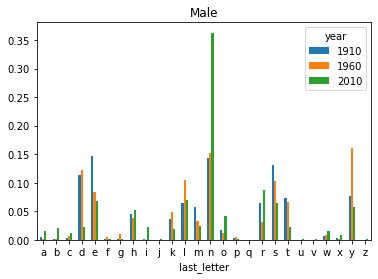

In [153]:
normalized_subset["M"].plot(kind="bar", rot=0, title="Male")

<AxesSubplot:title={'center':'Male'}, xlabel='last_letter'>

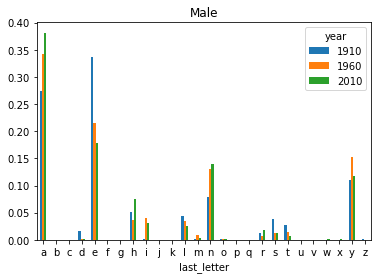

In [154]:

normalized_subset["F"].plot(kind="bar", rot=0, title="Male")

# trends of last letter

<AxesSubplot:xlabel='year'>

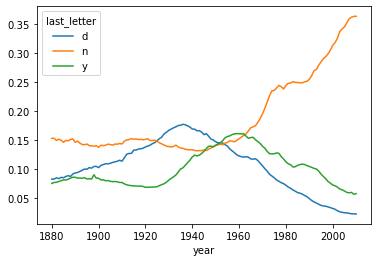

In [163]:
letter_table = letter_table / letter_table.sum()
dny = letter_table.loc[["d", "n", "y"], "M"]
dny = dny.T
dny.plot()

Boy names that became girl names 

In [165]:
top1000 = top1000.reset_index()
top1000

,year,sex,level_2,name,births,prop
0,1880,F,0,Mary,7065,0.077643
1,1880,F,1,Anna,2604,0.028618
2,1880,F,2,Emma,2003,0.022013
3,1880,F,3,Elizabeth,1939,0.021309
4,1880,F,4,Minnie,1746,0.019188
...,...,...,...,...,...,...
261872,2010,M,995,Camilo,194,0.000102
261873,2010,M,996,Destin,194,0.000102
261874,2010,M,997,Jaquan,194,0.000102
261875,2010,M,998,Jaydan,194,0.000102


In [171]:
names_sex = top1000.pivot_table("births", index="name",
    columns=["year", "sex"], aggfunc="sum")
names_sex = names_sex.reset_index()

In [175]:
lesl = names_sex[names_sex["name"].str.startswith("Lesl")]\
    .reset_index(drop=True)

In [176]:
lesl

year    name 1880        1881       1882        1883         1884  ...  \
sex             F     M     F     M    F      M    F      M     F  ...   
0     Leslee  NaN   NaN   NaN   NaN  NaN    NaN  NaN    NaN   NaN  ...   
1     Lesley  NaN   NaN   NaN   NaN  NaN    6.0  NaN    5.0   NaN  ...   
2      Lesli  NaN   NaN   NaN   NaN  NaN    NaN  NaN    NaN   NaN  ...   
3     Leslie  8.0  79.0  11.0  92.0  9.0  122.0  7.0  120.0  15.0  ...   
4      Lesly  NaN   NaN   NaN   NaN  NaN    NaN  NaN    NaN   NaN  ...   

year    2006        2007        2008        2009        2010      
sex        F   M       F   M       F   M       F   M       F   M  
0        NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN  
1      370.0 NaN   351.0 NaN     NaN NaN     NaN NaN     NaN NaN  
2        NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN  
3     3035.0 NaN  2689.0 NaN  2323.0 NaN  1975.0 NaN  1558.0 NaN  
4      761.0 NaN   765.0 NaN   699.0 NaN   598.0 NaN   502.0 NaN  

[5 rows x 263 columns]

top1000

In [58]:
grouped = top1000.reset_index().groupby(["name", "year", "sex"]).size()

grouped = grouped.unstack(level=2, fill_value=0)

In [59]:
grouped

sex           F  M
name    year      
Aaden   2008  0  1
        2009  0  1
        2010  0  1
Aaliyah 1994  1  0
        1995  1  0
...          .. ..
Zula    1931  1  0
        1932  1  0
        1933  1  0
        1935  1  0
Zuri    2010  1  0

[247839 rows x 2 columns]

In [60]:
def get_sex_change(group):
    if group["F"].sum() > 0 & group["M"].sum() > 0:
        group["sex_change"] = True
    else:
        group["sex_change"] = False
    return group
    
grouped1 = grouped.groupby("name").apply(get_sex_change)

In [64]:
grouped1["sex_change"].any()

False

In [61]:
names_w_sex_change = grouped1[grouped1["sex_change"]]

In [62]:
names_w_sex_change

,sex,F,M,sex_change
name,year,,,


In [183]:
grouped.loc[idx[:, ["M", "F"], :]]

name   sex  year
Aaden  M    2008     955
            2009    1265
            2010     448
Aarav  M    2008     219
            2009     270
                    ... 
Zula   F    1931      59
            1932      50
            1933      58
            1935      51
Zuri   F    2010     258
Name: births, Length: 261877, dtype: int64

In [67]:
# lesley like names in top1000
lesley_like = top1000[top1000["name"].str.startswith("Lesl")]["name"].unique()

In [68]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered

name  births      prop
year sex                              
1880 F   632  Leslie       8  0.000088
     M   166  Leslie      79  0.000715
1881 F   520  Leslie      11  0.000120
     M   134  Leslie      92  0.000913
1882 F   635  Leslie       9  0.000083
...              ...     ...       ...
2008 F   450   Lesly     699  0.000371
2009 F   159  Leslie    1975  0.001081
         501   Lesly     598  0.000327
2010 F   196  Leslie    1558  0.000886
         579   Lesly     502  0.000285

[400 rows x 3 columns]

In [69]:
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [99]:
def normalize_births(group):
    return group / group.sum()
filtered_normalized = filtered.groupby(["year", "sex"])["births"].sum()

In [101]:
filtered_normalized = filtered_normalized.unstack(level=1)
filtered_normalized

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [104]:
sex_change = filtered_normalized.div(\
    filtered_normalized.sum(axis="columns"), axis="index")
sex_change.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [106]:
sex_change.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


<AxesSubplot:xlabel='year'>

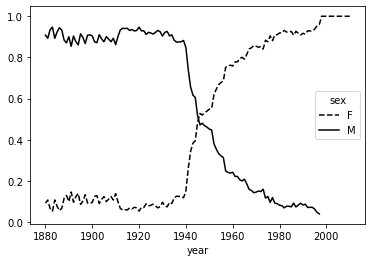

In [105]:
sex_change.plot(style={"M": "k-", "F": "k--"})